## NAME : SHALINI PR

### PART II:
## Data Visualization on Honey Production dataset using seaborn and matplotlib libraries.

### Objective:
    The Goal is to use Python visualization libraries such as seaborn and matplotlib to investigate the data and get some useful conclusions.

### Questions:
### 1. Import required libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
honeyproduction_data = pd.read_csv('honeyproduction.csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
print(honeyproduction_data.sample(5)) # Display the first few samples

    state    numcol  yieldpercol   totalprod     stocks  priceperlb  \
447    NV   10000.0           29    290000.0    52000.0        1.42   
468    AR   24000.0           57   1368000.0   301000.0        1.42   
172    WY   38000.0           77   2926000.0   468000.0        0.65   
71     ND  255000.0          105  26775000.0  8836000.0        0.59   
166    UT   23000.0           38    874000.0   315000.0        0.65   

      prodvalue  year  
447    412000.0  2008  
468   1943000.0  2009  
172   1902000.0  2001  
71   15797000.0  1999  
166    568000.0  2001  


In [4]:
print(honeyproduction_data.shape)# Check the shape of the data

(626, 8)


In [5]:
print(honeyproduction_data.info())# Get information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB
None


### 3. Display the percentage distribution of the data in each year using the pie chart.

In [6]:
yearly_production = honeyproduction_data.groupby('year')['prodvalue'].sum()
yearly_production

year
1998    146091000.0
1999    123657000.0
2000    131568000.0
2001    132282000.0
2002    227302000.0
2003    252079000.0
2004    197307000.0
2005    160793000.0
2006    157924000.0
2007    161356000.0
2008    229992000.0
2009    213920000.0
2010    278370000.0
2011    258688000.0
2012    280725000.0
Name: prodvalue, dtype: float64

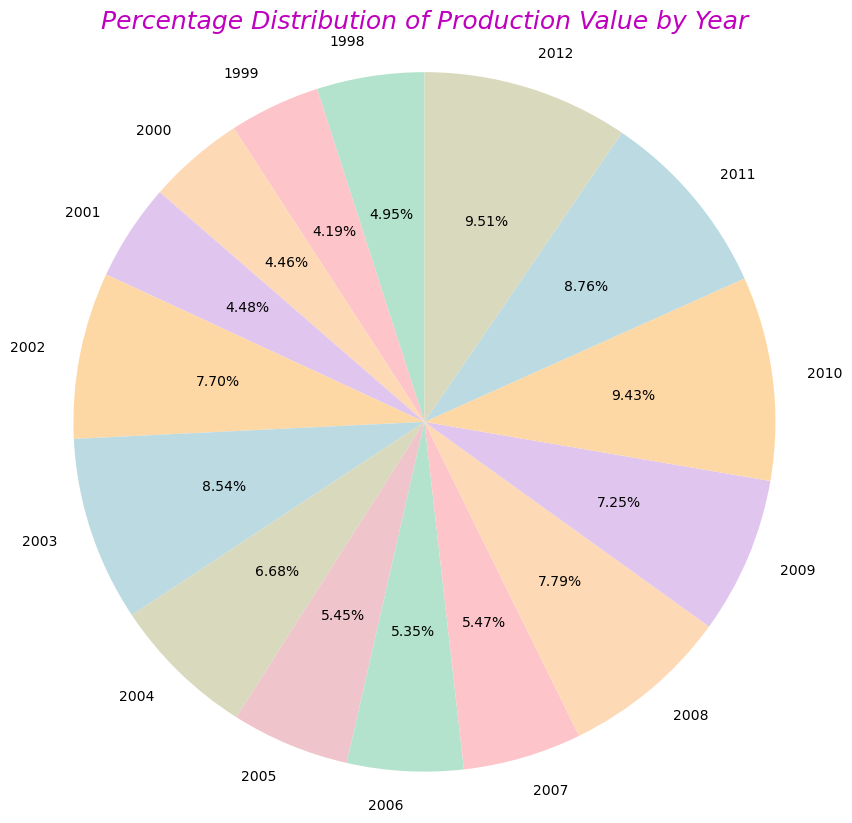

In [7]:
plt.figure(figsize=(10, 10))
pastel_colors = [
    (0.701, 0.886, 0.803),  # Mint Green
    (0.992, 0.769, 0.788),  # Light Pink
    (0.992, 0.855, 0.710),  # Light Peach
    (0.878, 0.776, 0.933),  # Lavender
    (0.992, 0.847, 0.647),  # Light Orange
    (0.737, 0.855, 0.886),  # Light Blue
    (0.851, 0.851, 0.741),  # Light Yellow
    (0.937, 0.773, 0.796), # Light Rose
]
plt.pie(yearly_production, labels=yearly_production.index, autopct='%1.2f%%', startangle=90,colors=pastel_colors)
plt.axis('equal') # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.title('Percentage Distribution of Production Value by Year', color='m',fontsize=18,fontstyle='italic')
plt.show()

### 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

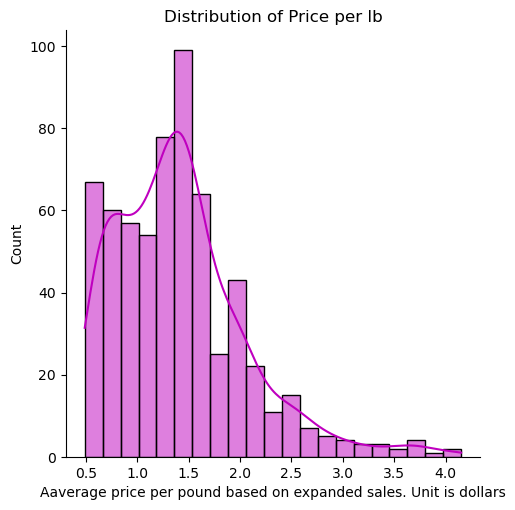

In [8]:
# Plot the distribution of 'price per lb' using displot (histogram)
sns.displot(honeyproduction_data['priceperlb'], kde=True,color='m')
plt.title('Distribution of Price per lb')
plt.xlabel('Aaverage price per pound based on expanded sales. Unit is dollars')
plt.show()

In [9]:
average_price_per_lb = honeyproduction_data['priceperlb'].mean()
median_price_per_lb = honeyproduction_data['priceperlb'].median()

print("Average price per pound: ${:.2f}".format(average_price_per_lb))
print("Median price per pound: ${:.2f}".format(median_price_per_lb))

Average price per pound: $1.41
Median price per pound: $1.36


### INFERENCE:
    1. The distplot shows that the distribution of the average price per pound based on expanded sales is positive or right skewed distribution. [ Mean > Median : Positive or right skewed distribution]
    2. The tail of the distribution extends towards the higher values (to the right) of the plot.
    3. The majority of the prices per pound are concentrated towards the lower end, and there are few extreme higher values that pull the tail towards the right side.
    4. The mean price per pound will be affected by the few higher extreme values, while the median price per pound will represent the central tendency of the majority of the prices.

### 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.


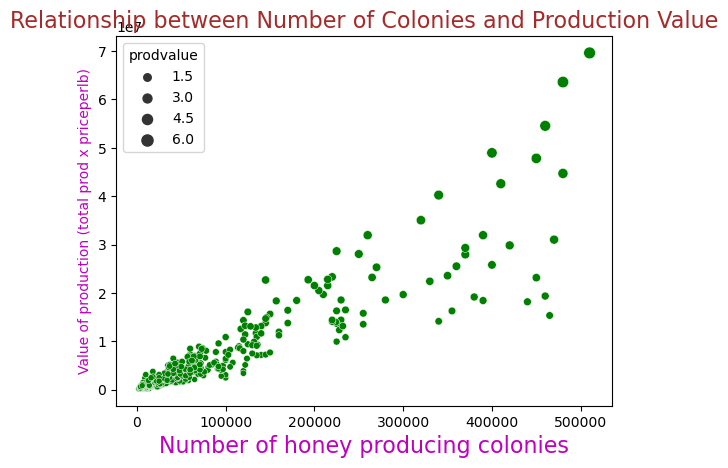

In [10]:
# Plot the scatterplot between 'numcol' and 'prodval'
sns.scatterplot(data=honeyproduction_data, x='numcol', y='prodvalue',size='prodvalue', color='green')
plt.title('Relationship between Number of Colonies and Production Value', color='brown', fontsize=16)
plt.xlabel('Number of honey producing colonies',color='m',fontsize=16)
plt.ylabel('Value of production (total prod x priceperlb)', color='m',fontsize=10)
plt.show()

In [11]:
correlation_coefficient = honeyproduction_data['numcol'].corr(honeyproduction_data['prodvalue'])
print("Correlation coefficient between 'numcol' and 'prodval':", correlation_coefficient)

Correlation coefficient between 'numcol' and 'prodval': 0.9127962488930386


### INFERNCE :
    The relation between the number of colonies and production value is strong positive linear correlation and the correlation coefficient is 0.912, which indicates that the correlation is very strong.
    1. As the number of honey producing colonies increases, there is a tendency for the value of production to increase.
    2. This positive correlation suggests that a higher number of honey producing colonies are associated with higher production values.
    3. Beekeepers or honey producers with larger colonies may generate more revenue from their honey production activities.
    4. The positive relationship between 'numcol' and 'prodval' might indicate that a larger workforce of honey producing colonies results in a higher yield of honey and other related products, leading to increased production value.

### 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.

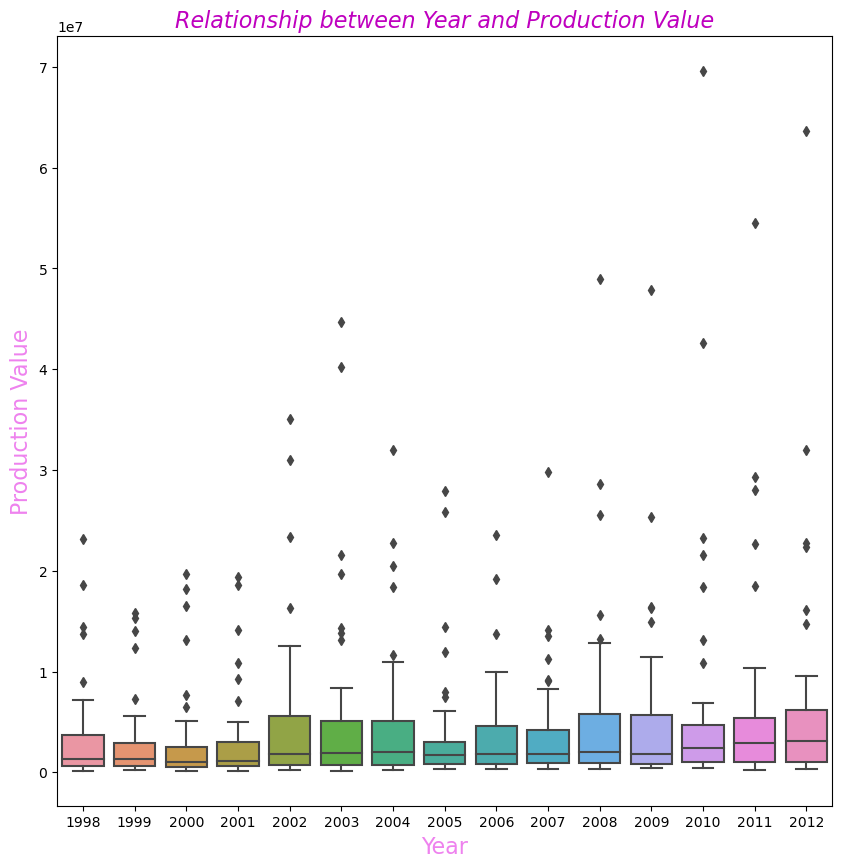

In [12]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=honeyproduction_data, x='year', y='prodvalue') # Plot the boxplot between 'year' and 'prodvalue'
plt.title('Relationship between Year and Production Value',color='m', fontsize=16,fontstyle='italic')
plt.xlabel('Year',color='violet', fontsize=16)
plt.ylabel('Production Value',color='violet', fontsize=16)
plt.show()

### INFERENCE:
    The boxplot displays the distribution of production values for each year. It helps us identify any potential trends or outliers across different years.
    1. From the above box plot, we can see that 2010,2011,2012 have higesht production values.
    2. The production values highly varies from the median vales.
    3. The outliers here indicates that the production value for year increases.

### 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')


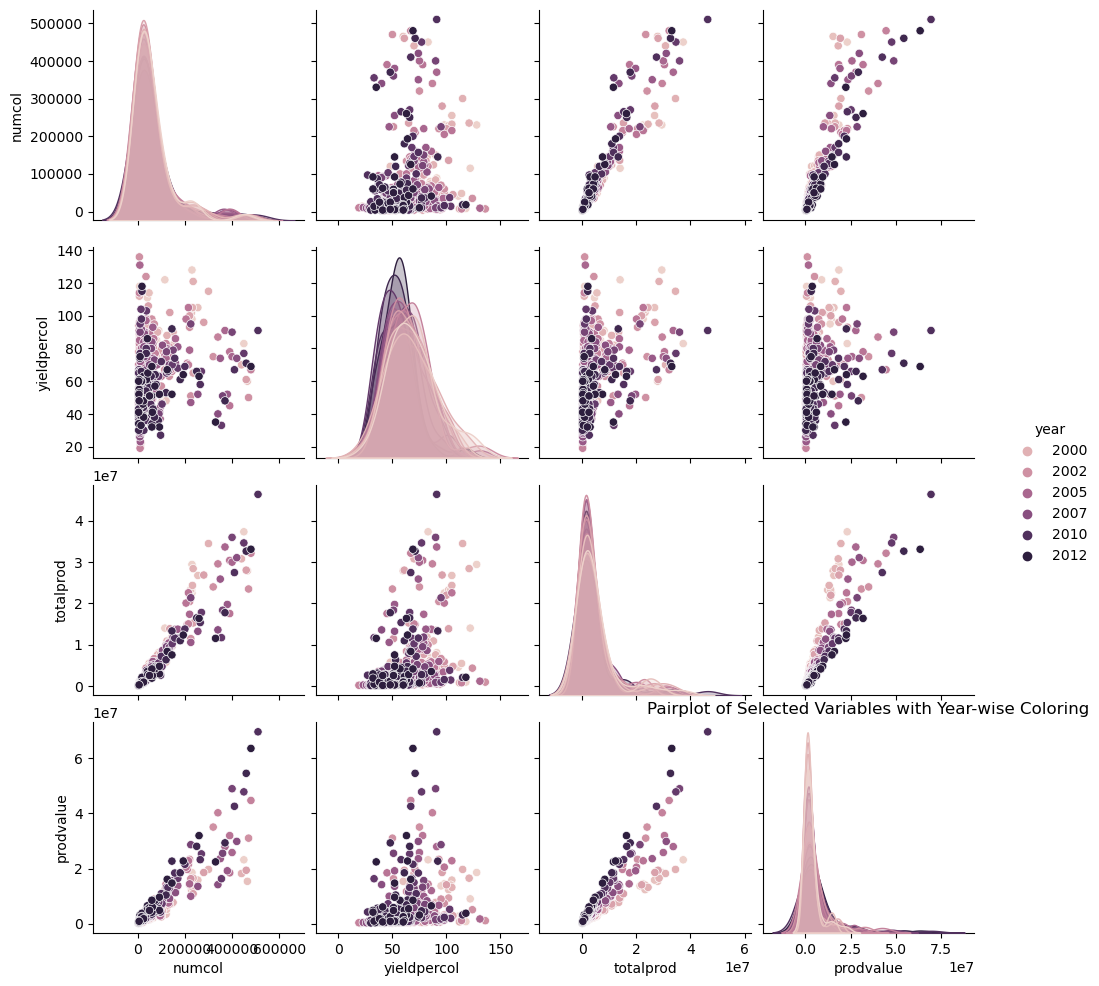

In [13]:
# Select the required columns for the pairplot
selected_columns = ['numcol', 'yieldpercol', 'totalprod', 'prodvalue', 'year']
# Plot the pairplot
sns.pairplot(data=honeyproduction_data[selected_columns], hue='year')
plt.title('Pairplot of Selected Variables with Year-wise Coloring')
plt.show()

### INFERENCE

    The pairplot shows scatterplots between different pairs of variables, and each year is represented with a different color. It allows us to observe relationships between variables and how they evolve over different years.
    1.  As the Number of honey producing colonies increases, the Value of production,stocks held by producers,Total production also increases.
    2.  As the total production increases, the production value and stocks are also increases.


### 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')

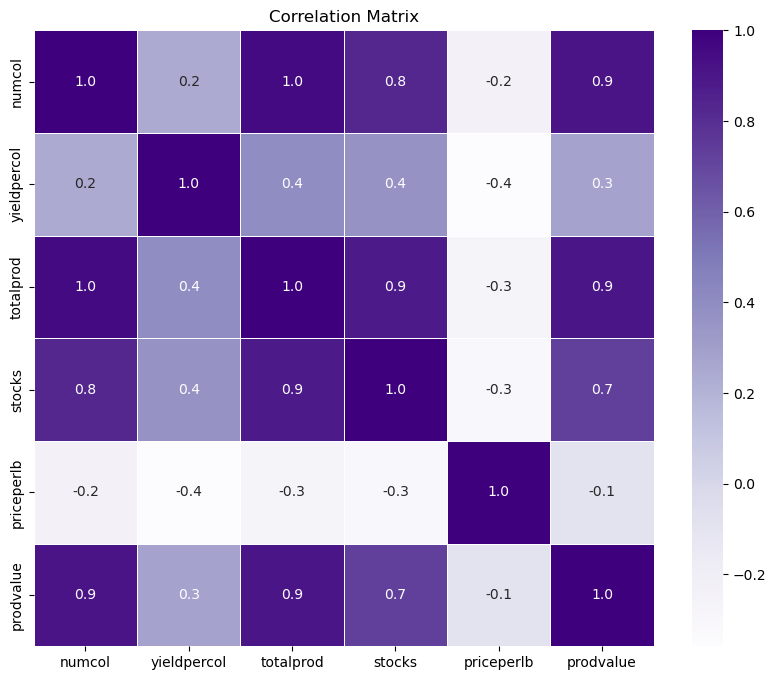

In [14]:
# Select the columns for which we want to calculate correlations
selectedcolumn = ['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']

# Calculate the correlation matrix
correlation_matrix = honeyproduction_data[selectedcolumn].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.1f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### INFERNCE:

#### The heatmap displays the correlation values between selected variables.From, this heatmap we can the relationship between 2 variables is positive or negative correlation. Positive values indicate a positive correlation, while negative values indicate a negative correlation.

    1. The relationship between numcol and prodvalue is positive correlation and correlation value is 0.9.
    2. The relationship between numcol and stocks is positive correlation and correlation value is 0.8.
    3. The relationship between numcol and total production is positive correlation and correlation value is 1.
    4. The relationship between total production and production value is positive correlation and correlation value is 0.9
    5. The relationship between total production and stocks is positive correlation and correlation value is 0.8
    6. The relationship between stocks and production value is positive correlation and correlation value is 0.8
    